Postal Codes Extraction Function

In [1]:
import osmnx as ox

def get_place_zip_polygons(place):
    # Get postal code polygons for the specified place using OSMnx
    zip_polygons = ox.features_from_place(place, tags={"boundary": "postal_code"})

    # Dictionary to store postal code areas and their polygons
    zip_polygon_dict = {}

    for idx, row in zip_polygons.iterrows():
        # Extract postal code and polygon
        zip_code = row['postal_code']
        zip_polygon = row['geometry']

        # Add the postal code and polygon to the dictionary
        zip_polygon_dict[zip_code] = zip_polygon

    return zip_polygon_dict

# Example call for Kassel
kassel_zip_polygons = get_place_zip_polygons("Kassel")

# Example call for Germany
#germany_zip_polygons = get_place_zip_polygons("Germany")

# Print the resulting dictionaries (for testing purposes)
print(kassel_zip_polygons)
#print(germany_zip_polygons)


{nan: <LINESTRING (9.489 51.324, 9.486 51.323, 9.486 51.322, 9.487 51.322, 9.482 5...>, '34123': <POLYGON ((9.489 51.292, 9.489 51.293, 9.489 51.293, 9.49 51.294, 9.49 51.29...>, '34121': <POLYGON ((9.449 51.313, 9.45 51.313, 9.478 51.312, 9.478 51.312, 9.479 51.3...>, '34233': <POLYGON ((9.485 51.378, 9.485 51.378, 9.486 51.378, 9.486 51.378, 9.486 51....>, '34125': <POLYGON ((9.503 51.321, 9.504 51.321, 9.504 51.321, 9.506 51.321, 9.507 51....>, '34128': <POLYGON ((9.369 51.349, 9.37 51.349, 9.37 51.35, 9.371 51.35, 9.371 51.35, ...>, '34131': <POLYGON ((9.351 51.307, 9.352 51.307, 9.352 51.308, 9.353 51.308, 9.354 51....>, '34132': <POLYGON ((9.362 51.293, 9.362 51.293, 9.363 51.293, 9.363 51.294, 9.364 51....>, '34119': <POLYGON ((9.446 51.315, 9.446 51.317, 9.447 51.317, 9.448 51.318, 9.449 51....>, '34130': <POLYGON ((9.409 51.326, 9.41 51.328, 9.412 51.328, 9.414 51.328, 9.42 51.32...>, '34134': <POLYGON ((9.43 51.3, 9.431 51.301, 9.433 51.301, 9.434 51.301, 9.442 51.302...>, '3

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


Postal Code Boundary Plot

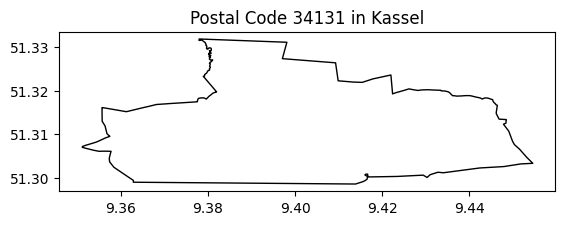

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Specify the postal code you want to plot
target_zip_code = '34131'

# Retrieve the specified postal code and its corresponding polygon
target_zip_polygon = kassel_zip_polygons.get(target_zip_code, None)

# Check if the specified postal code exists in the dictionary
if target_zip_polygon:
    # Plot the boundary of the specified postal code
    gdf = gpd.GeoDataFrame(geometry=[target_zip_polygon])
    gdf.boundary.plot(color="black", linewidth=1)

    plt.title(f'Postal Code {target_zip_code} in Kassel')
    plt.gca().set_facecolor('white')
    plt.show()
else:
    print(f"No information found for postal code {target_zip_code} in Kassel.")
